In [54]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [55]:
# Importing self-made libaries

import reload_lib as rl
import life_cycle_assessment as lc
import lcia_results as lr
import LCA_plots as lp
import non_bio_co2 as nbc



lib = [lc, lp, lr, nbc]

In [60]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']
rl.reload_lib(lib)

flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
You selected to not reload
case1_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_apos
case1_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_consq
case1_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_cut_off
case2_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_apos
case2_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_consq
case2_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_cut_off


In [61]:
rl.reload_lib(lib)

df, plot_x_axis_all, impact_categories, unique = {}, {}, {}, {}
for key, item in initialization.items():
    print(f"Perfoming LCA for {key}")
    # print(file_name_unique_process[key])
    df[key], plot_x_axis_all[key], impact_categories[key] = lr.quick_LCIA(item, file_name[key], file_name_unique_process[key], sheet_name[key])
    print()

Perfoming LCA for case1_apos
Recipe is selected
Initialization is completed for case1_apos
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_consq
Recipe is selected
Initialization is completed for case1_consq
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_cut_off
Recipe is selected
Initialization is completed for case1_cut_off
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_apos
Recipe is selected
Initialization is completed for case2_apos
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_consq
Recipe is selected
Initialization is completed for case2_consq
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_cut_off
Recipe is selected
Initialization is completed for case2_cut_off
DataFrame with nested lists written to Excel successfully.



In [52]:
case_keys = [key for key in initialization.keys()]
leg_pos_scaled = {
    'case1' : 0.65,
    'case2' : 0.909
}

leg_pos_gwp = {
    'case1' : 0.652,
    'case2' : 0.652
}

y_min_gwp =  {
    case_keys[0] : -0.6,    #case1 apos
    case_keys[1] : -0.4,    #case1 consq    
    case_keys[2] : -0.6,      #case1 cut off
    case_keys[3] : -0.4,      #case2 apos
    case_keys[4] : -0.2,      #case2 consq
    case_keys[5] : -0.4       #case2 cut off
}

y_max_gwp =  {
    case_keys[0] : 1.8,     #case1 apos
    case_keys[1] : 1.4,     #case1 consq
    case_keys[2] : 1.8,       #case1 cut off
    case_keys[3] : 1.6,       #case2 apos
    case_keys[4] : 1.6,       #case2 consq
    case_keys[5] : 1.6        #case2 cut off
}

y_step_gwp =  {
    case_keys[0] : 0.2,     #case1 apos
    case_keys[1] : 0.2,     #case1 consq
    case_keys[2] : 0.2,     #case1 cut off
    case_keys[3] : 0.2,     #case2 apos
    case_keys[4] : 0.2,     #case2 consq
    case_keys[5] : 0.2      #case2 cut off
}


amount_of_uses = {
    'case1' : 513,
    'case2' : 250
}

y_max_be =  {
    case_keys[0] : [300, 750],  #case1 apos
    case_keys[1] : [250, 650],  #case1 consq
    case_keys[2] : [300, 700],  #case1 cut off
    case_keys[3] : [300, 650],  #case2 apos
    case_keys[4] : [375, 650],  #case2 conqs
    case_keys[5] : [300, 650]   #case2 cut off
}

y_step_be =  {
    case_keys[0] : [25, 50],    #case1 apos
    case_keys[1] : [25, 50],    #case1 consq
    case_keys[2] : [25, 50],    #case1 cut off
    case_keys[3] : [25, 50],    #case2 apos
    case_keys[4] : [25, 50],    #case2 consq
    case_keys[5] : [25, 50]     #case2 cut off
}

x_step_be =  {
    'case1' : 50,
    'case2' : 25
}

break_even_product = {
    'case1' : 'container',
    'case2' : 'electro surgery'
}

plot_structure = [
    leg_pos_scaled,
    leg_pos_gwp,
    y_min_gwp,
    y_max_gwp,
    y_step_gwp,
    amount_of_uses,
    y_max_be,
    y_step_be,
    x_step_be,
    break_even_product
]

Creating figures for case1_apos


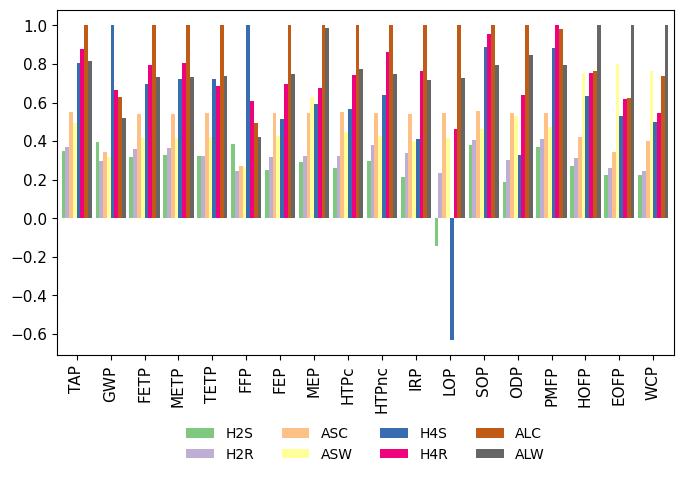

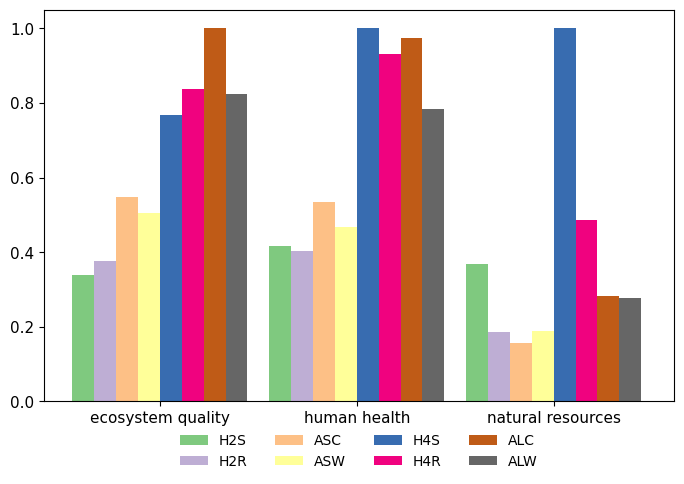

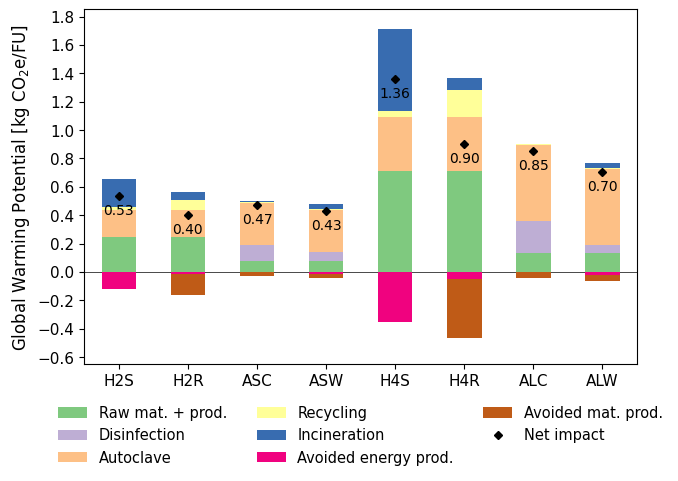

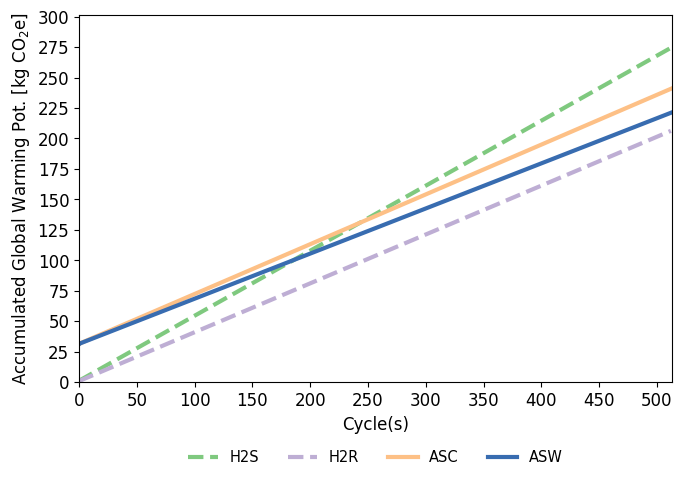

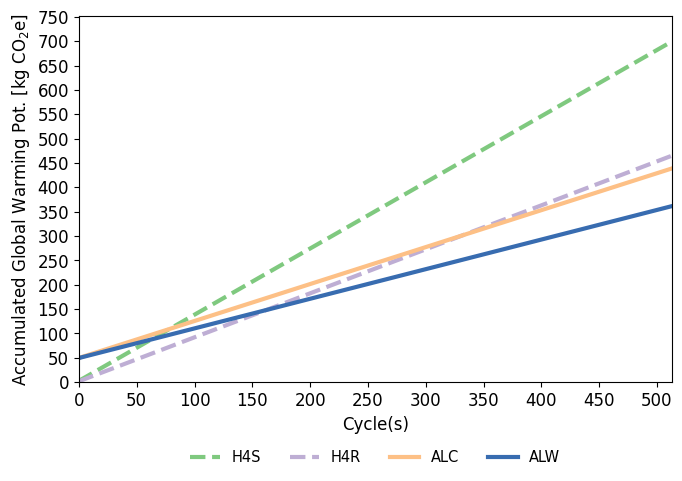

Creating figures for case1_consq


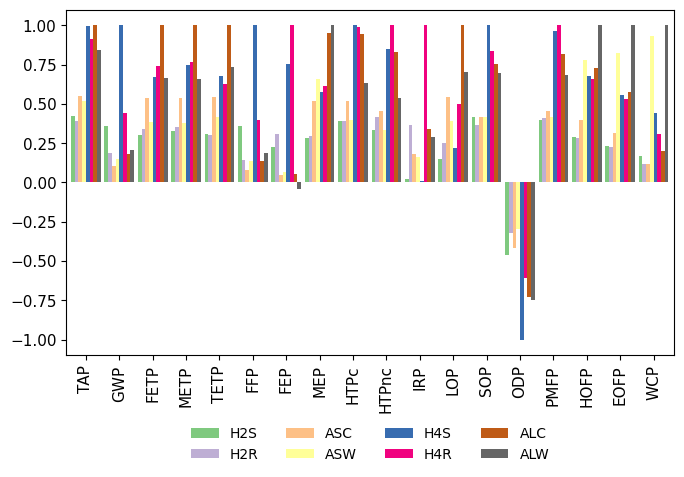

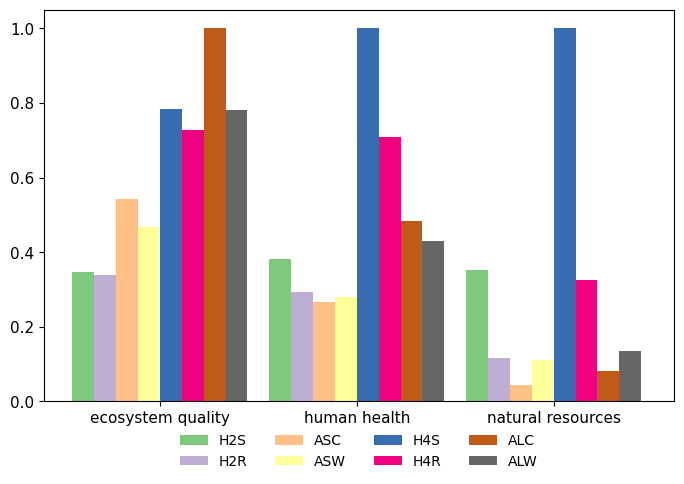

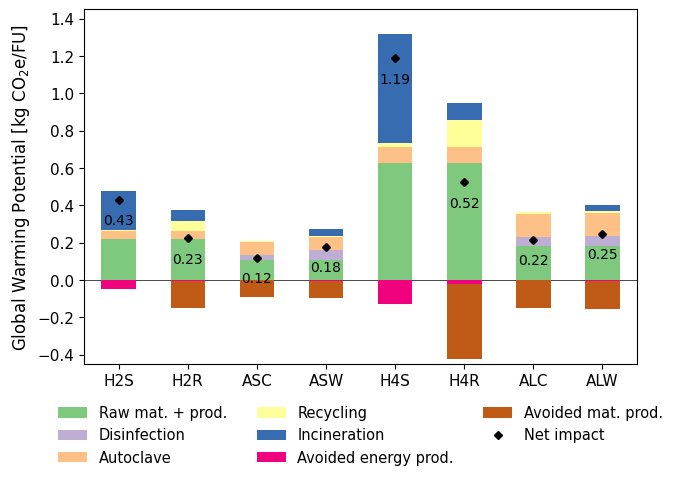

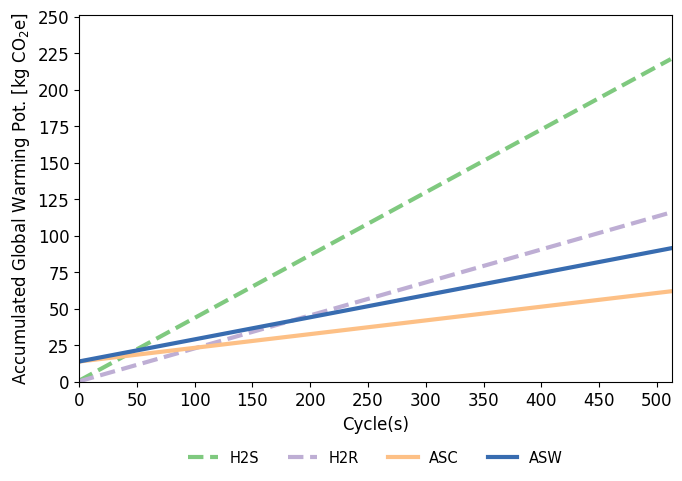

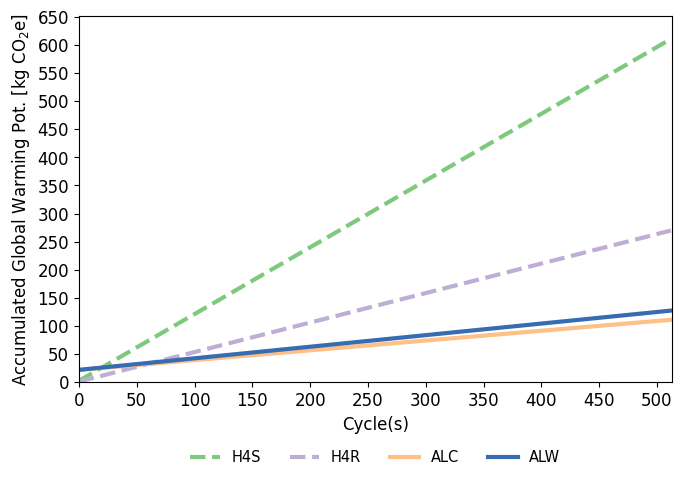

Creating figures for case1_cut_off


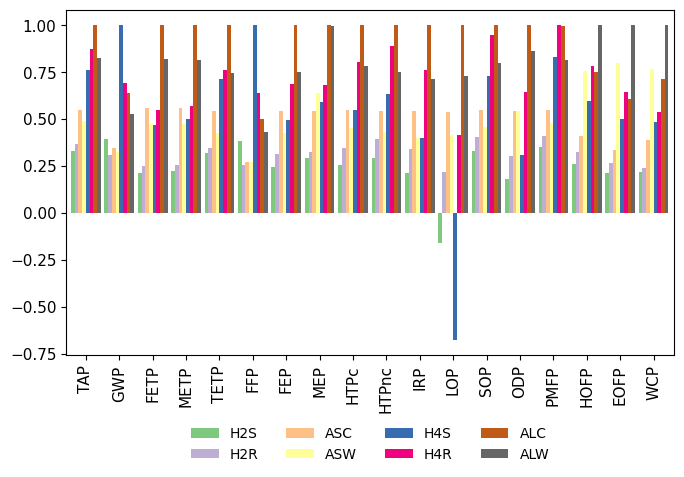

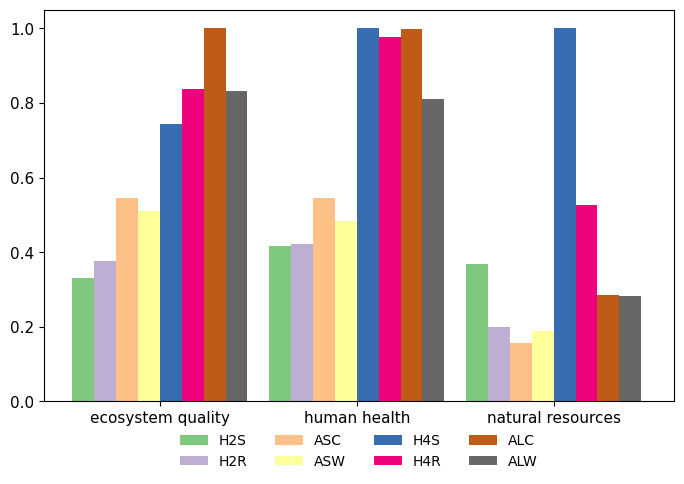

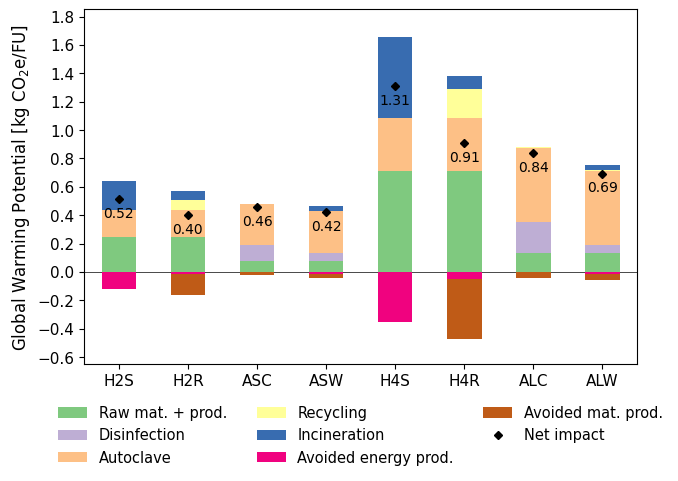

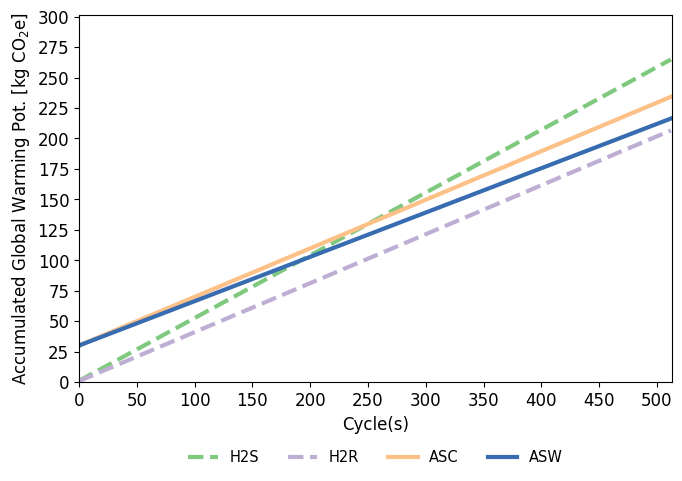

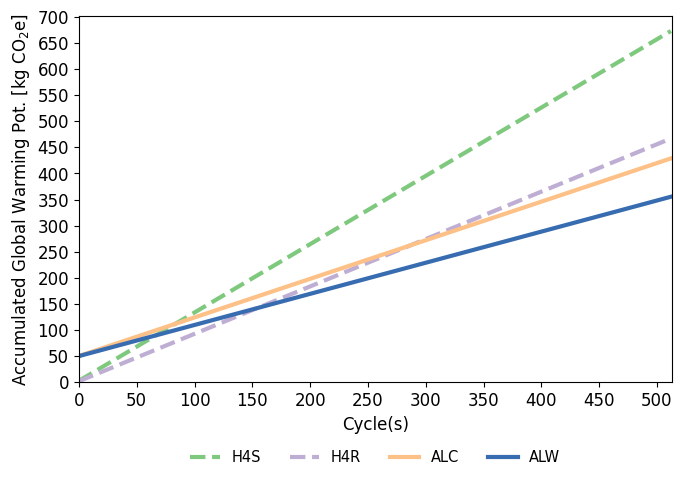

Creating figures for case2_apos


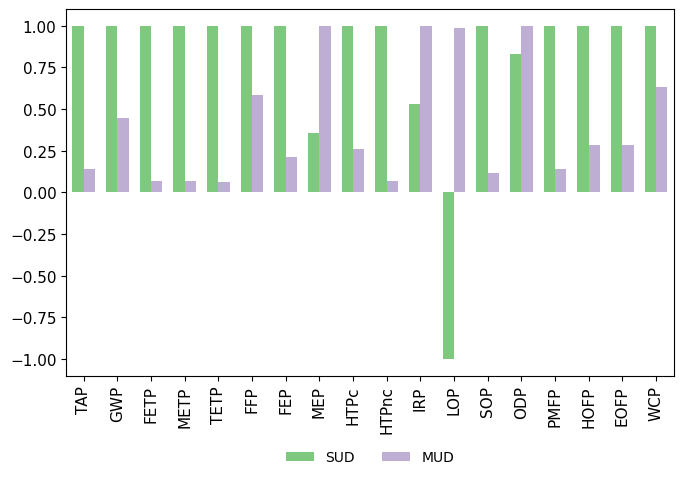

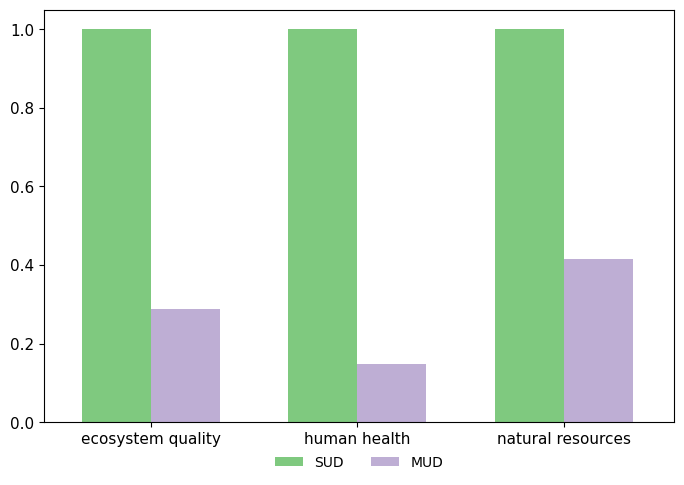

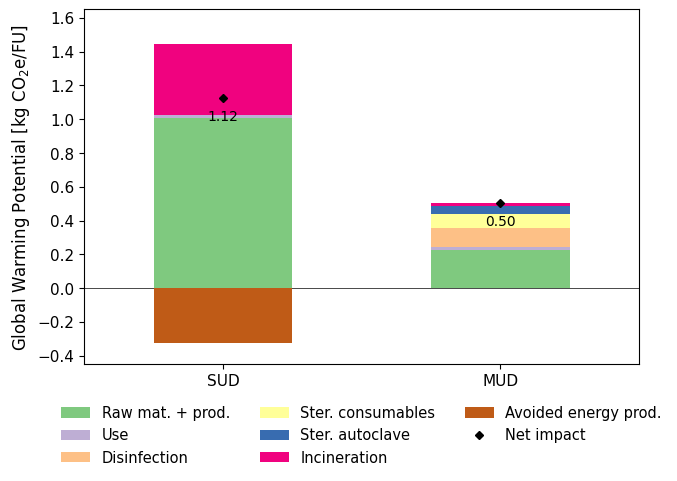

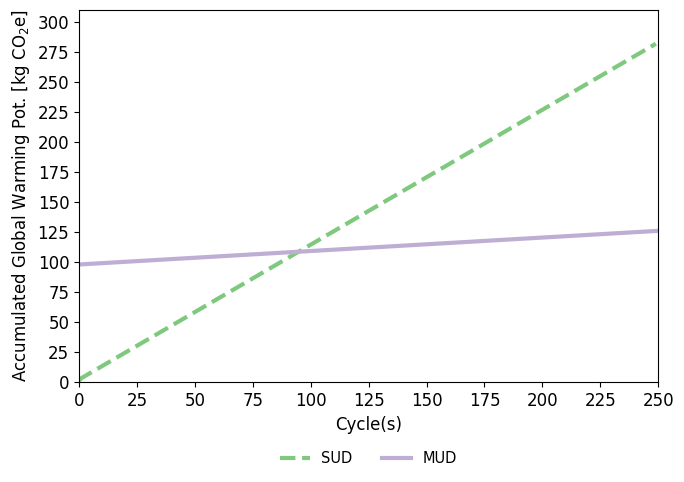

Creating figures for case2_consq


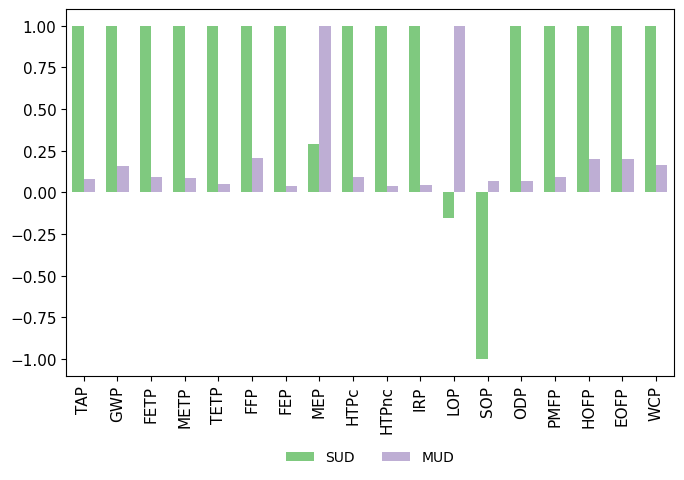

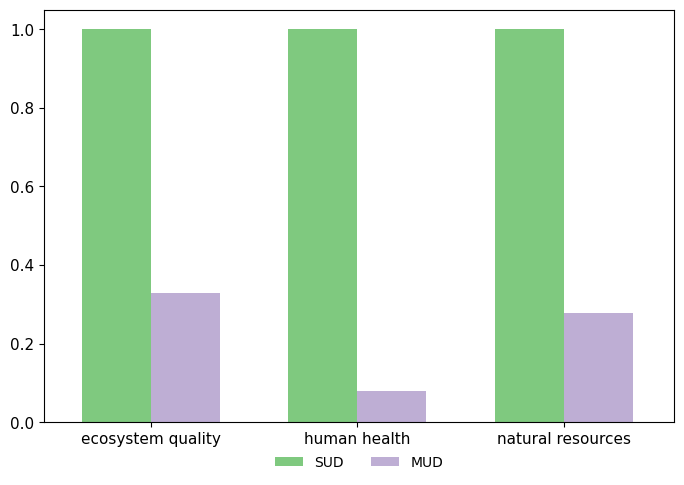

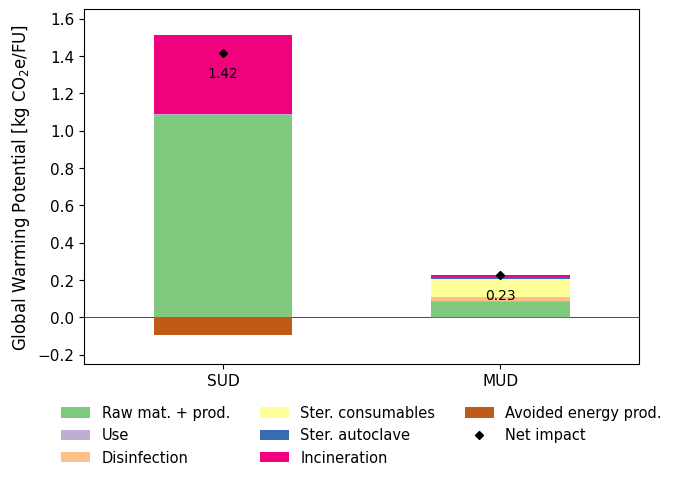

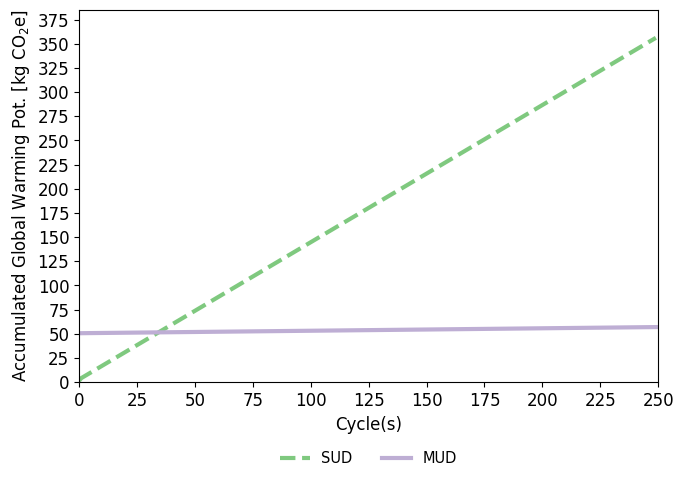

Creating figures for case2_cut_off


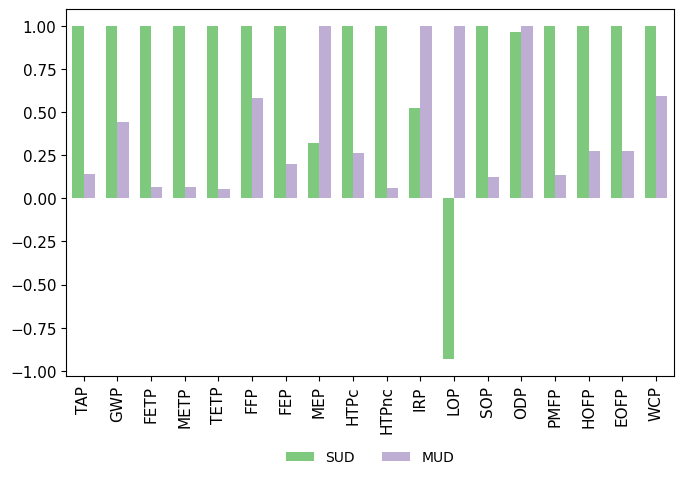

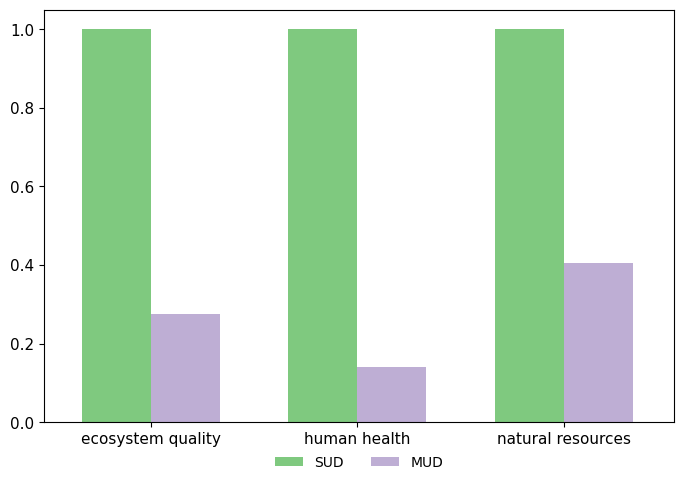

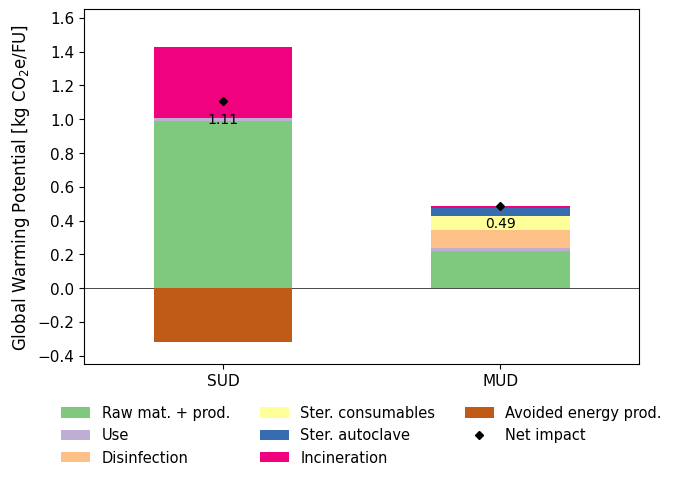

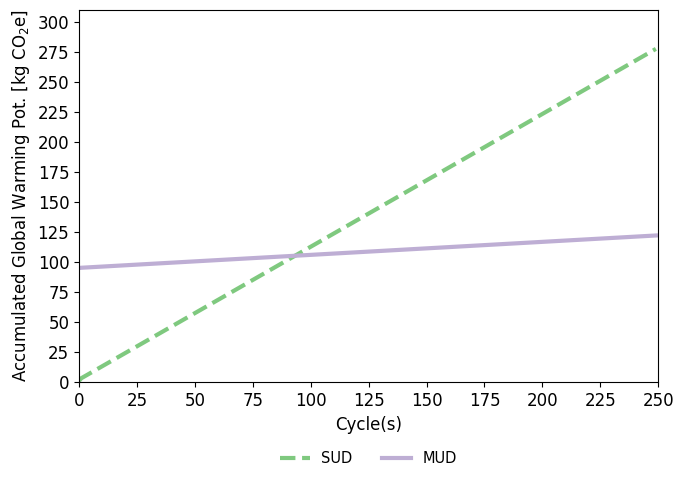

In [62]:
rl.reload_lib(lib)



lp.create_results_graphs(initialization, df, plot_x_axis_all, save_dir, impact_categories, flow_legend, plot_structure)